<a href="https://colab.research.google.com/github/piyu18/Learn_TensorFlow/blob/main/TensorFlow_Day04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Problem Statement
Can you accurately predict insurance costs?

Dataset is taken from [kaggle](https://www.kaggle.com/datasets/mirichoi0218/insurance?resource=download) 

### Dataset Description
* age: age of primary beneficiary

* sex: insurance contractor gender, female, male

* bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height,
objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9

* children: Number of children covered by health insurance / Number of dependents

* smoker: Smoking

* region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

* charges: Individual medical costs billed by health insurance

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split

In [2]:
# Read the dataset
df = pd.read_csv('insurance.csv')
df.sample(5)

,age,sex,bmi,children,smoker,region,charges
408,38,male,21.120,3,no,southeast,6652.52880
99,38,male,19.300,0,yes,southwest,15820.69900
1013,48,male,32.300,1,no,northwest,8765.24900
255,55,female,25.365,3,no,northeast,13047.33235
990,26,female,19.800,1,no,southwest,3378.91000


In [3]:
# Get the information about the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


We have to convert object type to nos as NN can't handle non numerical data. We will be using `pd.get_dummies()` to convert categorical value to numerical

In [4]:
df_new = pd.get_dummies(df)
df_new.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


Split data into features(X) and labels(y)

In [5]:
# Create X and y
X = df_new.drop(['charges'], axis=1)
y = df_new['charges']
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


In [6]:
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [7]:
# Create train_test split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=13)

In [ ]:
tf.random.set_seed(13)
# Create a Model
model1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

# Compile the Model
model1.compile(loss='mae',
               optimizer='SGD',
               metrics=['mae'])

# Fit the Model
model1.fit(X_train, y_train, epochs=100, verbose=2)

In [9]:
# Check the results of the model1
model1.evaluate(X_test, y_test)

9/9 [==============================] - 0s 3ms/step - loss: 7143.7920 - mae: 7143.7920


[7143.7919921875, 7143.7919921875]

As we can see that our Model is not performing well. So, let's try to improve our Model by:
* Increasing the no of layes
* Increasing the no of units in each layer except Output layer
* Change the Optimizer 
* Increase the no of Epochs

In [10]:
# Set random seed
tf.random.set_seed(13)

# Create a Model with an extra layer
model2 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(1)
])

# Compile the model
model2.compile(loss='mae',
                optimizer='Adam',
                metrics=['mae'])

# Fit the model
history = model2.fit(X_train, y_train, epochs=200, verbose=0)

In [11]:
# Evaluate the model
model2_loss, model2_mae = model2.evaluate(X_test,y_test)

9/9 [==============================] - 0s 4ms/step - loss: 3085.9749 - mae: 3085.9749


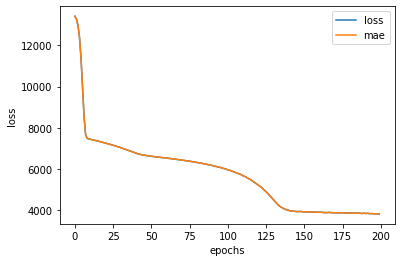

In [12]:
# Plot history (also known as a loss curve)
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs");

From the graph we can see that with change in optimizer and increase in epochs, our loss reduced to almost half when compared to previous model

### Preprocessing of data(Normalization and Standardization)
* Normalization: Normalization is a scaling technique in Machine Learning applied during data preparation to change the values of numeric columns in the dataset to use a common scale. 
* Standardization: This technique is to re-scale features value with the distribution value between 0 and 1 

⚡We mostly use Normalization in case of Neural Network



Since we need to transform our non numerical column to numerical as before and we have to normalize our data also, so let's try use another Scikit lean library `make_column_transformer()`

In [13]:
df = pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [14]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
# Create column transformer
ct = make_column_transformer(
    (MinMaxScaler(), ["age", "bmi", "children"]), # get all values between 0 and 1
    (OneHotEncoder(handle_unknown="ignore"), ["sex", "smoker", "region"])
)
#Create X and y
X = df.drop('charges', axis=1)
y = df['charges']

# Build train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

# Fit column transformer on the training data only(if we fit on test data then there will be data leakage)
ct.fit(X_train)

ColumnTransformer(transformers=[('minmaxscaler', MinMaxScaler(),
                                 ['age', 'bmi', 'children']),
                                ('onehotencoder',
                                 OneHotEncoder(handle_unknown='ignore'),
                                 ['sex', 'smoker', 'region'])])

In [15]:
# Transform training and test data with normalization (MinMaxScalar) and one hot encoding (OneHotEncoder)
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [16]:
X_train_normal[0]

array([0.23913043, 0.36803874, 0.2       , 0.        , 1.        ,
       1.        , 0.        , 1.        , 0.        , 0.        ,
       0.        ])

In [17]:
# Set random seed
tf.random.set_seed(42)

# Build the model (3 layers, 100, 10, 1 units)
insurance_model = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

# Compile the model
insurance_model.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=['mae'])

# Fit the model for 200 epochs (same as insurance_model_2)
history = insurance_model.fit(X_train_normal, y_train, epochs=200, verbose=0) 

In [18]:
# Evaluate the Model
insurance_model_3_loss, insurance_model_3_mae = insurance_model.evaluate(X_test_normal, y_test)


9/9 [==============================] - 0s 2ms/step - loss: 2925.9624 - mae: 2925.9624


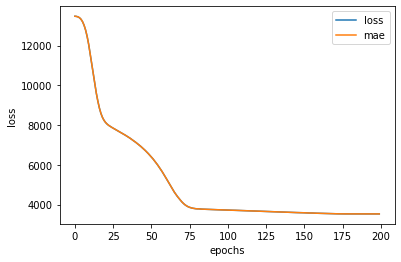

In [19]:
# Plot history (also known as a loss curve)
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs");

In [22]:
# Compare model results from non-normalized data and normalized data
model2_mae, insurance_model_3_mae

(3085.974853515625, 2925.96240234375)

#### Happy Learning !!
You can connect and follow me @
  * [LinkedIn](https://www.linkedin.com/in/priya-singh1803)
  * [Github](https://github.com/piyu18/)
  * [Medium](https://medium.com/@priya1803)
